In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

Queremos agora saber se o fato de **uma pessoa reclamar na plataforma a torna detratora** (detrator aqui seria não comprar mais em nossa plataforma). <br>
Tomando como base a coluna Complain, veja que o grupo de pessoas que reclamam tem menos gastos (expense) do que pessoas que não reclamam. <br>
Use um teste *paramétrico* e um *não paramétrico*. Discuta as diferenças


In [74]:

mkt_data = pd.read_csv('../data/06. Testes não paramétricos/mkt_data.csv').drop('Unnamed: 0', axis=1)
mkt_data = mkt_data.drop_duplicates()

print(mkt_data.shape)
display(mkt_data.head())
display(
    pd.DataFrame({
        'Tipo': mkt_data.dtypes,
        'Qtde nulos': mkt_data.isnull().sum(),
        'Proporção nulos': mkt_data.isnull().mean(),
        'Qtde unicos': mkt_data.nunique(),
        'Exemplo unicos': mkt_data.apply(lambda x: x.unique()[:3])
    })
)

(2021, 43)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,58138.0,0,0,58,635,88,546,172,88,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,46344.0,1,1,38,11,1,6,2,1,6,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,71613.0,0,0,26,426,49,127,111,21,42,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,26646.0,1,0,26,11,4,20,10,3,5,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,58293.0,1,0,94,173,43,118,46,27,15,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


,Tipo,Qtde nulos,Proporção nulos,Qtde unicos,Exemplo unicos
Income,float64,0,0.000000,1963,"[58138.0, 46344.0, 71613.0]"
Kidhome,int64,0,0.000000,3,"[0, 1, 2]"
Teenhome,int64,0,0.000000,3,"[0, 1, 2]"
Recency,int64,0,0.000000,100,"[58, 38, 26]"
MntWines,int64,0,0.000000,775,"[635, 11, 426]"
MntFruits,int64,0,0.000000,158,"[88, 1, 49]"
MntMeatProducts,int64,0,0.000000,551,"[546, 6, 127]"
MntFishProducts,int64,0,0.000000,182,"[172, 2, 111]"
MntSweetProducts,int64,0,0.000000,176,"[88, 1, 21]"
MntGoldProds,int64,0,0.000000,212,"[88, 6, 42]"


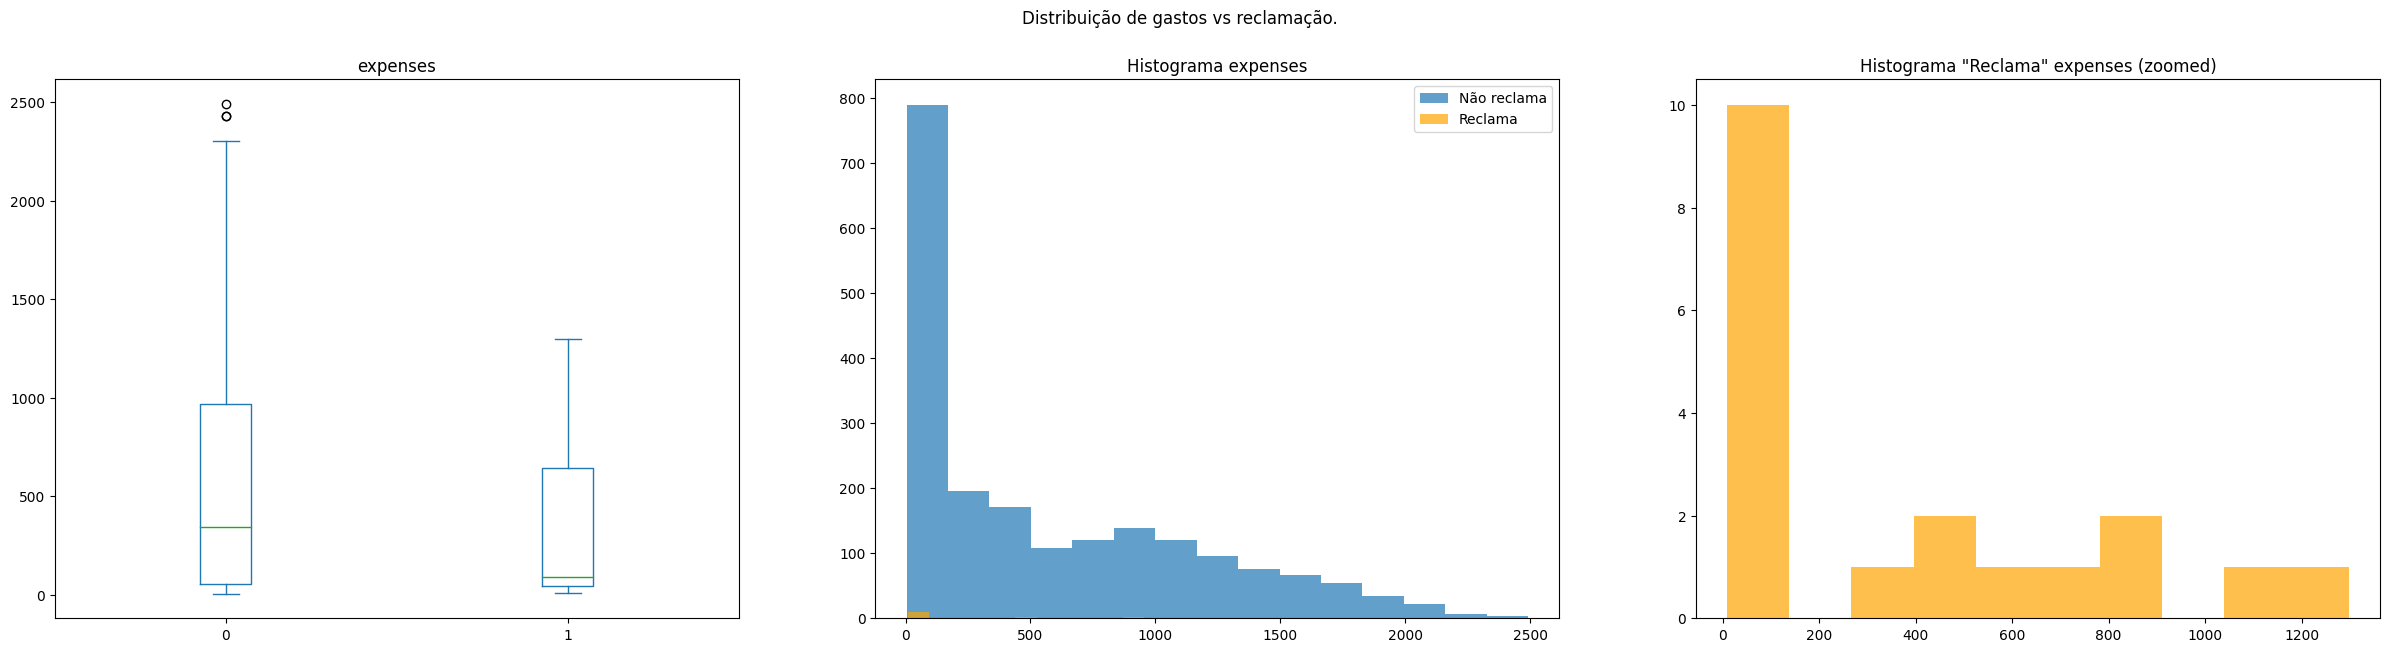

expenses            
            count        mean
Complain                     
0            2002  565.523976
1              19  381.000000

pelos graficos de boxplot conseguimos observar uma certa diferença entre as distribuições; 
pelos graficos de histograma conseguimos ver que as distribuições são semelhantes menos pela escala, pois pouco menos de 1% dos clientes reclamam.


In [ ]:

plt.close('all')
fig, axs = plt.subplots(1, 3, figsize=(30, 7))

mkt_data.plot.box(by='Complain', column='expenses',ax=axs[0])

axs[1].hist(mkt_data[mkt_data['Complain']==0]['expenses'], bins=15, alpha=0.7, label='Não reclama')
axs[1].hist(mkt_data[mkt_data['Complain']==1]['expenses'], bins=15, alpha=0.7, color='orange', label='Reclama')
axs[1].legend()
axs[1].set_title('Histograma expenses')

axs[2].hist(mkt_data[mkt_data['Complain']==1]['expenses'], bins=10, alpha=0.7, color='orange')
axs[2].set_title('Histograma "Reclama" expenses (zoomed)')

fig.suptitle('Distribuição de gastos vs reclamação.')
plt.show()

display(mkt_data.groupby('Complain')[['expenses']].agg({'expenses':['count','mean']}))
print('pelos graficos de boxplot conseguimos observar uma certa diferença entre as distribuições; \npelos graficos de histograma conseguimos ver que as distribuições são semelhantes menos pela escala, pois pouco menos de 1% dos clientes reclamam.')

In [72]:

c = .95
a = 1-c

#1. teste de hipotese parametrico.
print('teste de hipotese paramétrico (t-student com var pop desconhecidas e supostamente iguais):')

_, p_value = scipy.stats.ttest_ind(mkt_data[mkt_data['Complain']==0]['expenses'], mkt_data[mkt_data['Complain']==1]['expenses'], equal_var=True)
# obs: a quantidade de pessoas no grupo das pessoas que reclamam é pouco para se usar o TLC e a distribuição não segue a normal, logo não deveriamos confiar em um teste paramétrico nesse caso.
if p_value > a: print(f'h0 aceita, a c={c} e p-value={p_value} médias estatisticamente iguais.')
else: print(f'h0 rejeitada, a c={c} e p-value={p_value} médias estatisticamente diferentes.')

#2. teste de hipotese não parametrico.
print('\nteste de hipotese não paramétrico (Mann Whitney):')
_, p_value = scipy.stats.mannwhitneyu(mkt_data[mkt_data['Complain']==0]['expenses'], mkt_data[mkt_data['Complain']==1]['expenses'], alternative='two-sided')
if p_value > a: print(f'h0 aceita, a c={c} e p-value={p_value} médias estatisticamente iguais.')
else: print(f'h0 rejeitada, a c={c} e p-value={p_value} médias estatisticamente diferentes.')

teste de hipotese paramétrico (t-student com var pop desconhecidas e supostamente iguais):
h0 aceita, a c=0.95 e p-value=0.12180935471513422 médias estatisticamente iguais.

teste de hipotese não paramétrico (Mann Whitney):
h0 aceita, a c=0.95 e p-value=0.09469749118274157 médias estatisticamente iguais.


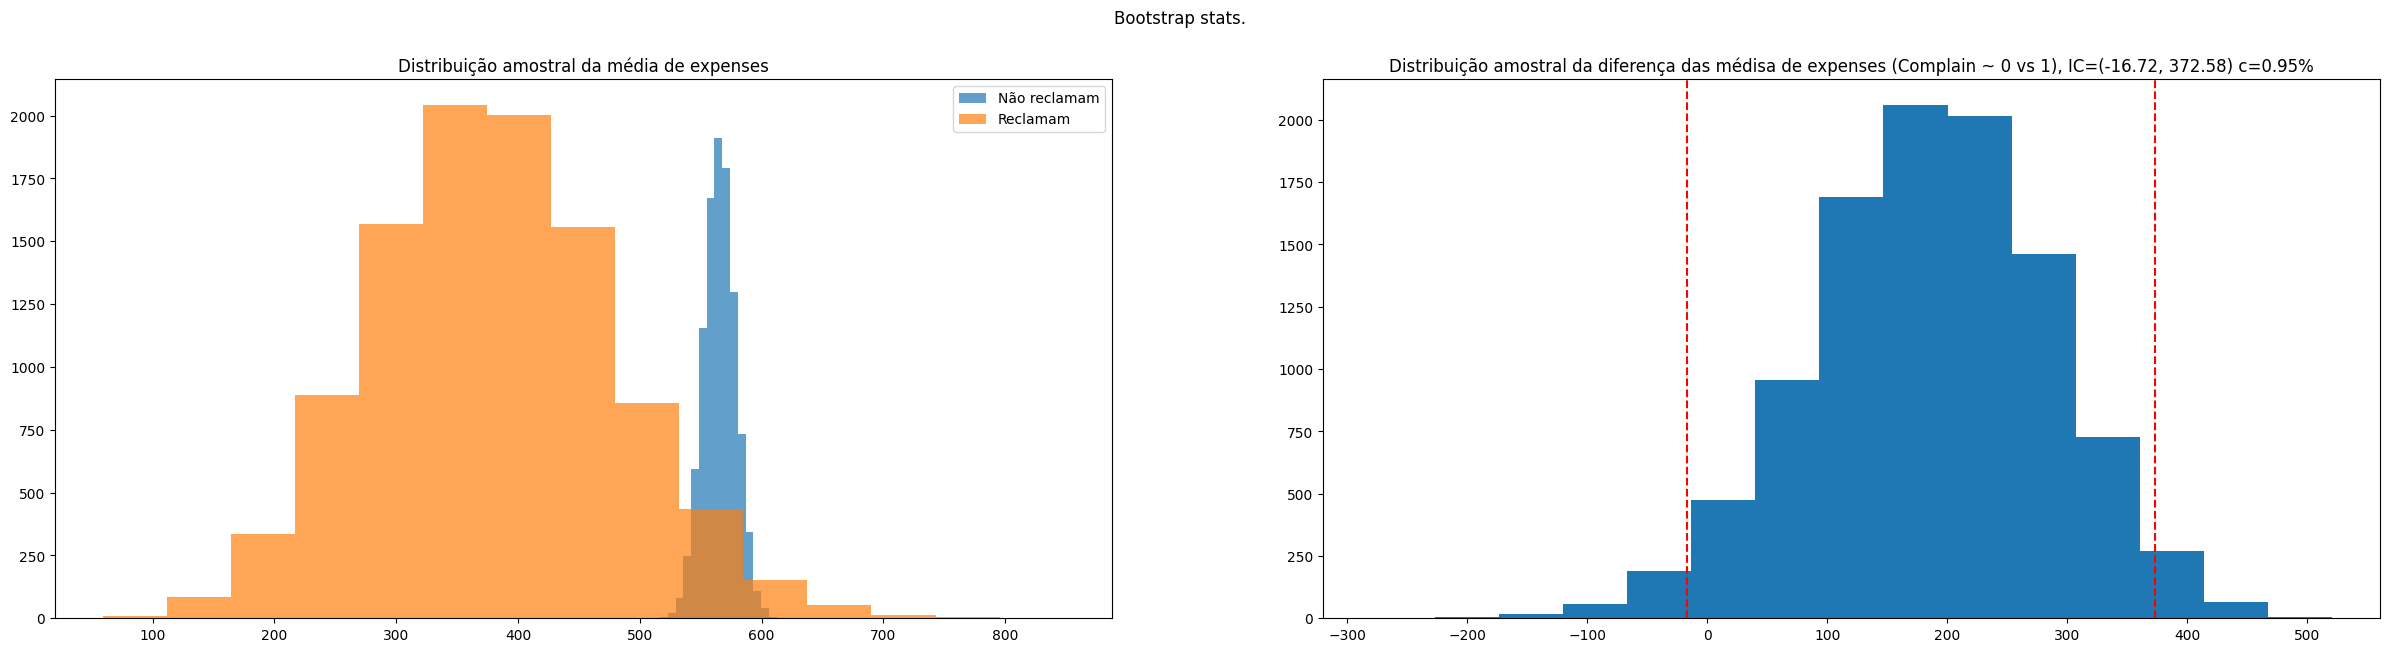

h0 aceita, a c=0.95 médias estatisticamente iguais.


In [79]:

#3. bootstrap
m1s = []
m2s = []
bootstrap_stats = []
for _ in range(10000):
    bootstrap_sample =  mkt_data[['Complain','expenses']].sample(mkt_data.shape[0], replace=True)

    m1 = bootstrap_sample[bootstrap_sample['Complain']==0]['expenses'].mean()
    m2 = bootstrap_sample[bootstrap_sample['Complain']==1]['expenses'].mean()

    m1s.append(m1)
    m2s.append(m2)
    bootstrap_stats.append(m1-m2)
bootstrap_stats.sort()

plt.close('all')

fig, axs = plt.subplots(1, 2, figsize=(30,7))

axs[0].hist(m1s, bins=15, alpha=.7, label='Não reclamam')
axs[0].hist(m2s, bins=15, alpha=.7, label='Reclamam')
axs[0].legend()
axs[0].set_title('Distribuição amostral da média de expenses')

axs[1].hist(bootstrap_stats, bins=15)
IC_inf = round(np.percentile(bootstrap_stats, 100*(1-c)/2), 2)
IC_sup = round(np.percentile(bootstrap_stats, 100*(c+(1-c)/2)), 2)
axs[1].axvline(x=IC_inf, color='r', linestyle='--')
axs[1].axvline(x=IC_sup, color='r', linestyle='--')
axs[1].set_title(f'Distribuição amostral da diferença das médisa de expenses (Complain ~ 0 vs 1), IC=({IC_inf}, {IC_sup}) c={c}%')

fig.suptitle('Bootstrap stats.')
plt.show()

if 0 >= IC_inf and 0 <= IC_sup: print(f'h0 aceita, a c={c} médias estatisticamente iguais.')
else: print(f'h0 rejeitada, a c={c} médias estatisticamente diferentes.')

In [77]:

print('''
    Todos os testes (1, 2 ~ paramétrico, não paramétrico ~ e 3 ~ bootstrap) aceitaram h0 (médias estatisticamente iguais) ~ não temos evidencia suficiente para rejeitar h0 ~ a uma confiança de 95%.
     Portanto o insight é que reclamar ou não reclamar não impacta na tendência monetaria (posto e média de "expenses") de consumo dos clientes.
    
    obs.: 
        - descartaremos o resultado do teste 1 ja que não respeita as premissas do teste (distribuição normal ou/e tamanho amostral pequeno).
        - o tamanho do grupo que reclama é muito pequeno (~~1% de todos os clientes), oq impacta bastante no teste de tal forma que obtemos pouco poder estatistico para rejeitar h0.
''')


    Todos os testes (1, 2 ~ paramétrico, não paramétrico ~ e 3 ~ bootstrap) aceitaram h0 (médias estatisticamente iguais) ~ não temos evidencia suficiente para rejeitar h0 ~ a uma confiança de 95%.
     Portanto o insight é que reclamar ou não reclamar não impacta na tendência monetaria (posto e média de "expenses") de consumo dos clientes.
    
    obs.: 
        - descartaremos o resultado do teste 1 ja que não respeita as premissas do teste (distribuição normal ou/e tamanho amostral pequeno).
        - o tamanho do grupo que reclama é muito pequeno (~~1% de todos os clientes), oq impacta bastante no teste de tal forma que obtemos pouco poder estatistico para rejeitar h0.

